In [30]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_dev = pd.read_csv('../dataset/development.csv')
df_eval = pd.read_csv('../dataset/evaluation.csv')

df = pd.concat([df_dev, df_eval], sort=False)
df.head()

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900.0,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300.0,tech,thursday
2,2,http://mashable.com/2013/10/30/digital-dinosau...,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700.0,lifestyle,wednesday
3,3,http://mashable.com/2014/08/27/homer-simpson-i...,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500.0,bus,wednesday
4,4,http://mashable.com/2013/01/10/creepy-robotic-...,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400.0,tech,thursday


## Data exploration

In [32]:
len(df_dev), len(df_eval), len(df)

(31715, 7917, 39632)

In [33]:
df.isna().any(axis=0).sort_values(ascending=False)

num_keywords                     True
shares                           True
num_imgs                         True
num_videos                       True
min_positive_polarity           False
LDA_03                          False
LDA_04                          False
global_subjectivity             False
global_sentiment_polarity       False
global_rate_positive_words      False
global_rate_negative_words      False
rate_positive_words             False
rate_negative_words             False
avg_positive_polarity           False
id                              False
max_positive_polarity           False
LDA_01                          False
avg_negative_polarity           False
min_negative_polarity           False
max_negative_polarity           False
title_subjectivity              False
title_sentiment_polarity        False
abs_title_subjectivity          False
abs_title_sentiment_polarity    False
data_channel                    False
LDA_02                          False
self_referen

In [34]:
df_dev['shares'].isna().sum()

0

### Multivariate analysis

##### One-hot encoding of categorical variables

In [35]:
enc = OneHotEncoder()
encoded_df = pd.concat([df_dev['weekday'], df_dev['data_channel']], axis=1)
enc.fit(encoded_df)
encoded_df = enc.transform(encoded_df)
additional_columns = enc.get_feature_names_out()
print(encoded_df.toarray().shape)
working_df_dev = df_dev.copy()
working_df_dev[additional_columns] = encoded_df.toarray()
working_df_dev.drop(['weekday', 'data_channel', 'url', 'id'], axis = 1, inplace=True)
working_df_dev

(31715, 13)


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,data_channel_bus,data_channel_entertainment,data_channel_lifestyle,data_channel_socmed,data_channel_tech,data_channel_world
0,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,435.0,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,134.0,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,728.0,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,37.0,11.0,440.0,0.564103,1.0,0.718978,10.0,2.0,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31711,52.0,14.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31712,121.0,9.0,969.0,0.489583,1.0,0.710623,6.0,5.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31713,503.0,11.0,1976.0,0.412308,1.0,0.621080,21.0,3.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Clean dataset
- See the features engineering reasons (skip this cell if you don't want to see this analysis based on the future feature engineering step)

In [36]:
working_df_dev = working_df_dev.query("n_tokens_content > 0")
working_df_dev['n_tokens_content'] = np.log(working_df_dev['n_tokens_content'])

working_df_dev['num_imgs'].fillna(0, inplace=True)
working_df_dev['num_imgs'] = np.log(1 + working_df_dev['num_imgs'])
working_df_dev['num_videos'].fillna(0, inplace=True)
working_df_dev['num_videos'] = np.log(1 + working_df_dev['num_videos'])

std_scaler = StandardScaler().fit(working_df_dev[['n_tokens_title', 'n_tokens_content']])
scaled_features = std_scaler.transform(working_df_dev[['n_tokens_title', 'n_tokens_content']])
working_df_dev[['n_tokens_title', 'n_tokens_content']] = scaled_features

working_df_dev['avg_negative_polarity'] = working_df_dev['avg_negative_polarity'].abs()
working_df_dev['num_keywords'].fillna(0, inplace=True)
working_df_dev['num_hrefs'] = np.log(1 + working_df_dev['num_hrefs'])
# working_df_dev['shares'] = np.log(working_df_dev['shares']) # --> it is done later

std_scaler = StandardScaler().fit(working_df_dev[['kw_avg_min', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
scaled_features = std_scaler.transform(working_df_dev[['kw_avg_min', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg']])
working_df_dev[['kw_avg_min', 'kw_avg_max', 'kw_min_avg', 'kw_avg_avg']] = scaled_features

std_scaler = StandardScaler().fit(working_df_dev[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']])
scaled_features = std_scaler.transform(working_df_dev[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']])
working_df_dev[['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess']] = scaled_features

/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/267323144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['n_tokens_content'] = np.log(working_df_dev['n_tokens_content'])
/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/267323144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df_dev['num_imgs'].fillna(0, inplace=True)
/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/267323144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

#### Correlation between variables
- Features seems not so much linear correlated with the target variable

In [37]:
corr_mat = working_df_dev.corr()
tmp = corr_mat['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.10066666374176124
-0.05854555831547926


In [38]:
corr_mat_non_linear = working_df_dev.corr(method='spearman')
tmp = corr_mat_non_linear['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.2625405624804913
-0.171240659931897


It seems that there are different variables correlated (maybe not linearly) with the target one

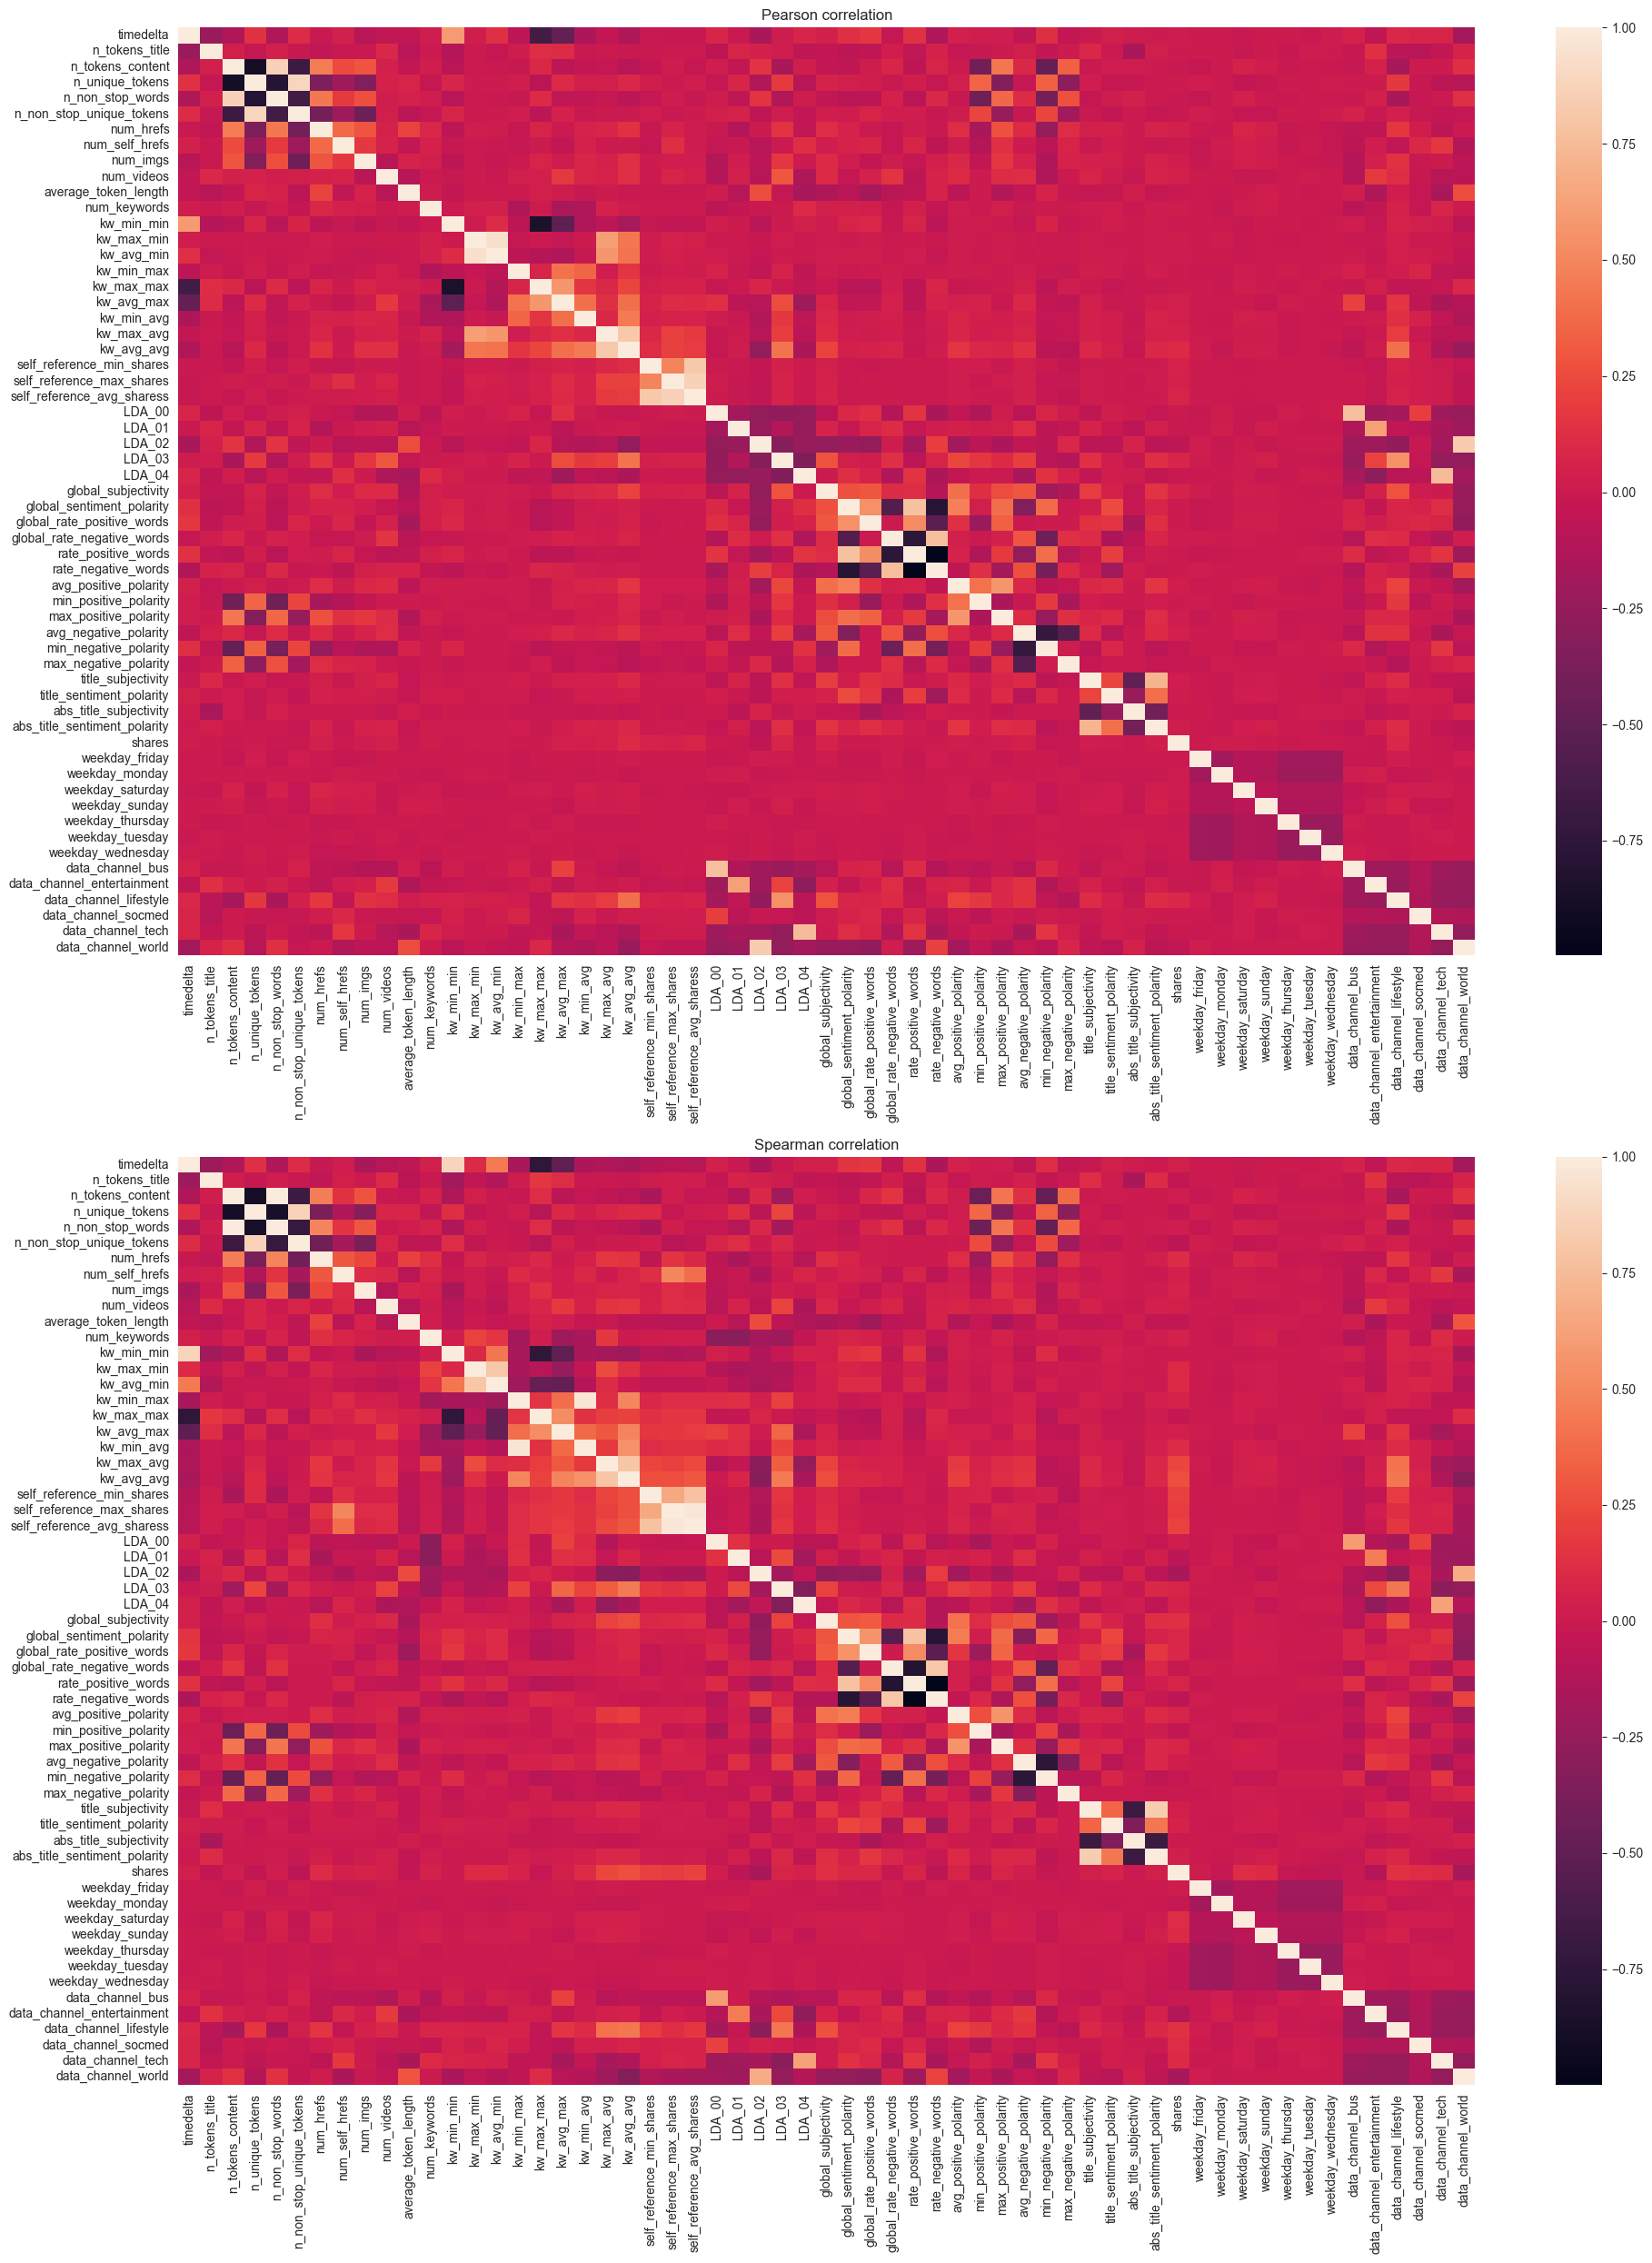

In [39]:
fig, ax = plt.subplots(2,1, figsize = (20,25))
sns.heatmap(corr_mat, ax=ax[0])
sns.heatmap(corr_mat_non_linear, ax=ax[1])
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman correlation')
plt.tight_layout()
plt.show()

#### Log scale of target variable
- This brought to an increase of the maximum correlation and a decrease of the minimum correlation w.r.t. the "shares" column with other 2 features. Then working with such a feature would be the best choice
- This improvement has been experience both for linear correlation and for non-linear correlation.

In [40]:
log_target_df = working_df_dev.copy()
log_target_df['shares'] = np.log(working_df_dev['shares'])
log_target_corr = log_target_df.corr()
tmp = log_target_corr['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.21844606089543095
-0.16652671426793336


In [41]:
non_lin_corr_log = log_target_df.corr(method='spearman')
tmp = non_lin_corr_log['shares'].drop('shares')
print(max(tmp))
print(min(tmp))

0.2625405624804913
-0.171240659931897


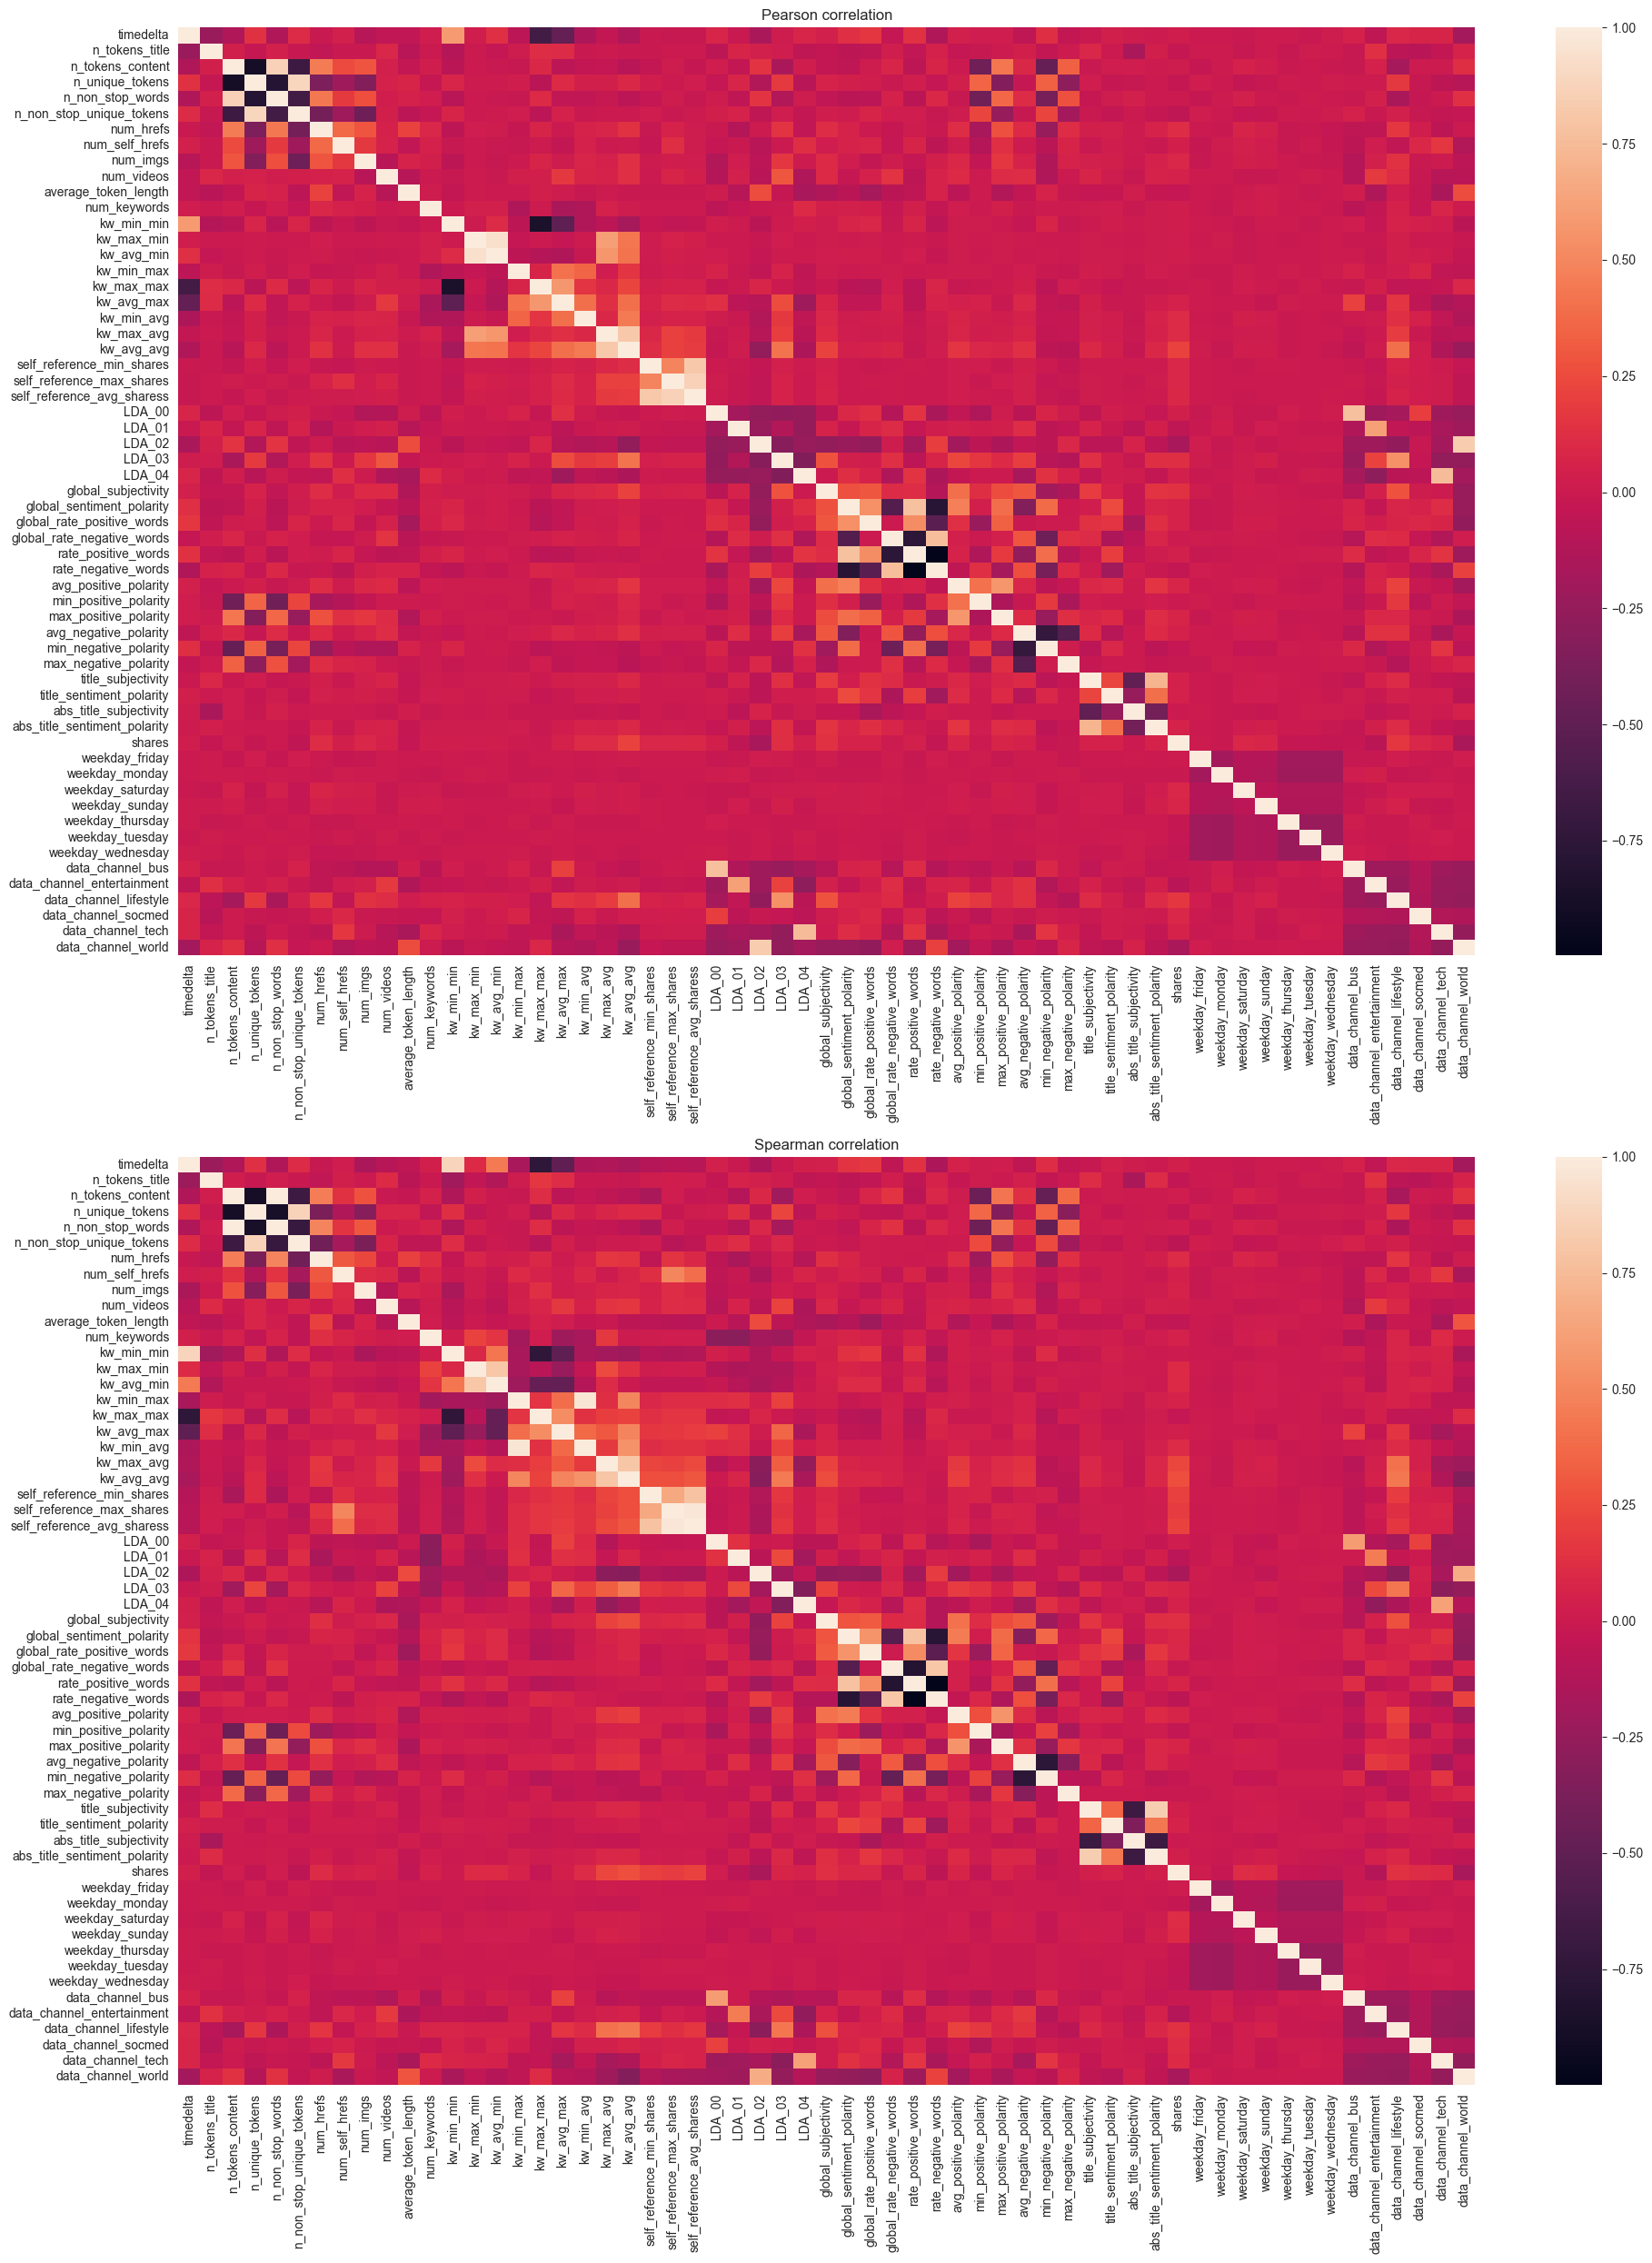

In [42]:
fig, ax = plt.subplots(2,1, figsize = (20,25))
sns.heatmap(log_target_corr, ax=ax[0])
sns.heatmap(non_lin_corr_log, ax=ax[1])
ax[0].set_title('Pearson correlation')
ax[1].set_title('Spearman correlation')
plt.tight_layout()
plt.show()

### Linear and Non-Linear correlation

#### Target variable VS temporal features
- Saturday and sunday have a weak linear positive correlation with the target variable

In [43]:
shares_corr = log_target_corr['shares']
shares_corr_sp = non_lin_corr_log['shares']

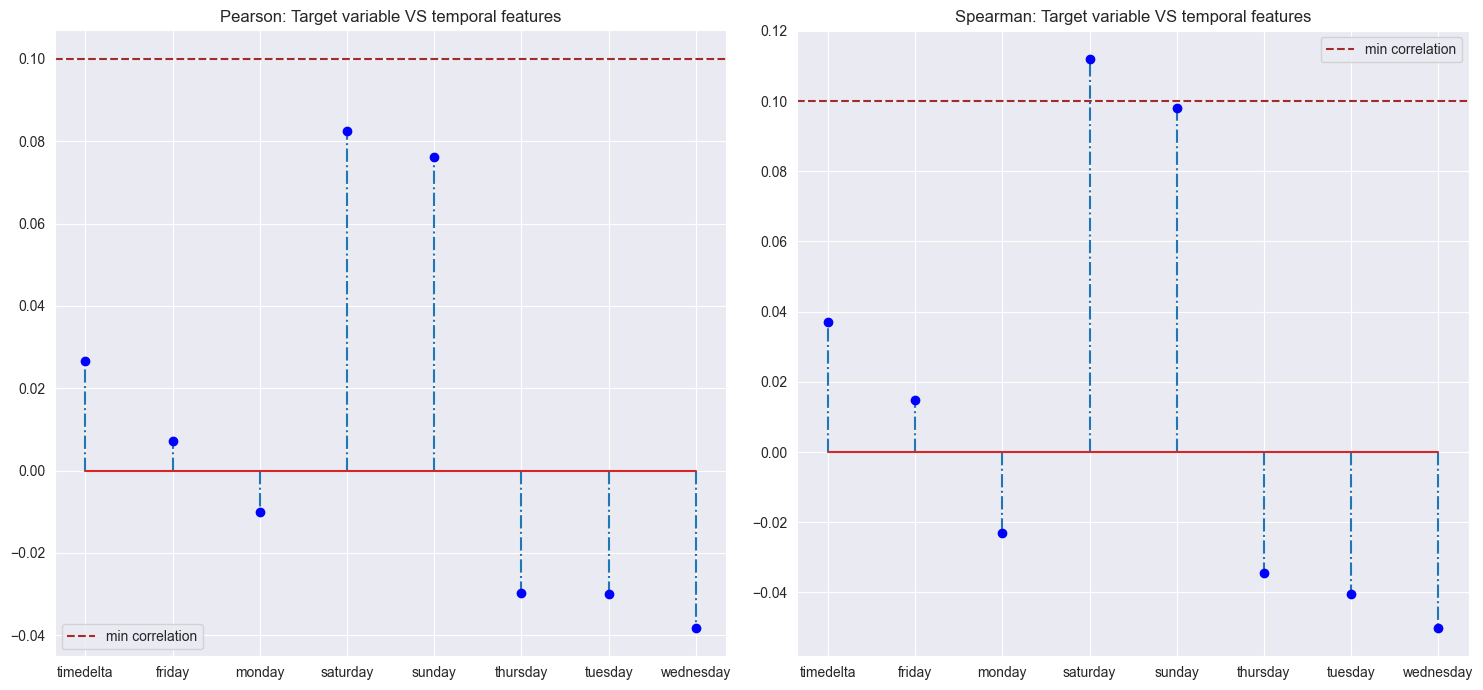

In [45]:
temp_attributes = ['timedelta','weekday_friday', 'weekday_monday', 'weekday_saturday',
                   'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
                   'weekday_wednesday']
df_temp = shares_corr[temp_attributes]
df_temp_sp = shares_corr_sp[temp_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(['timedelta','friday', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday',
       'wednesday'], df_temp, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[0].legend()
ax[0].set_title("Pearson: Target variable VS temporal features")
ax[1].stem(['timedelta','friday', 'monday', 'saturday',
            'sunday', 'thursday', 'tuesday',
            'wednesday'], df_temp_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS temporal features")
ax[1].legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Sentiment features
- The features show a weak linear correlation with the target variable. 

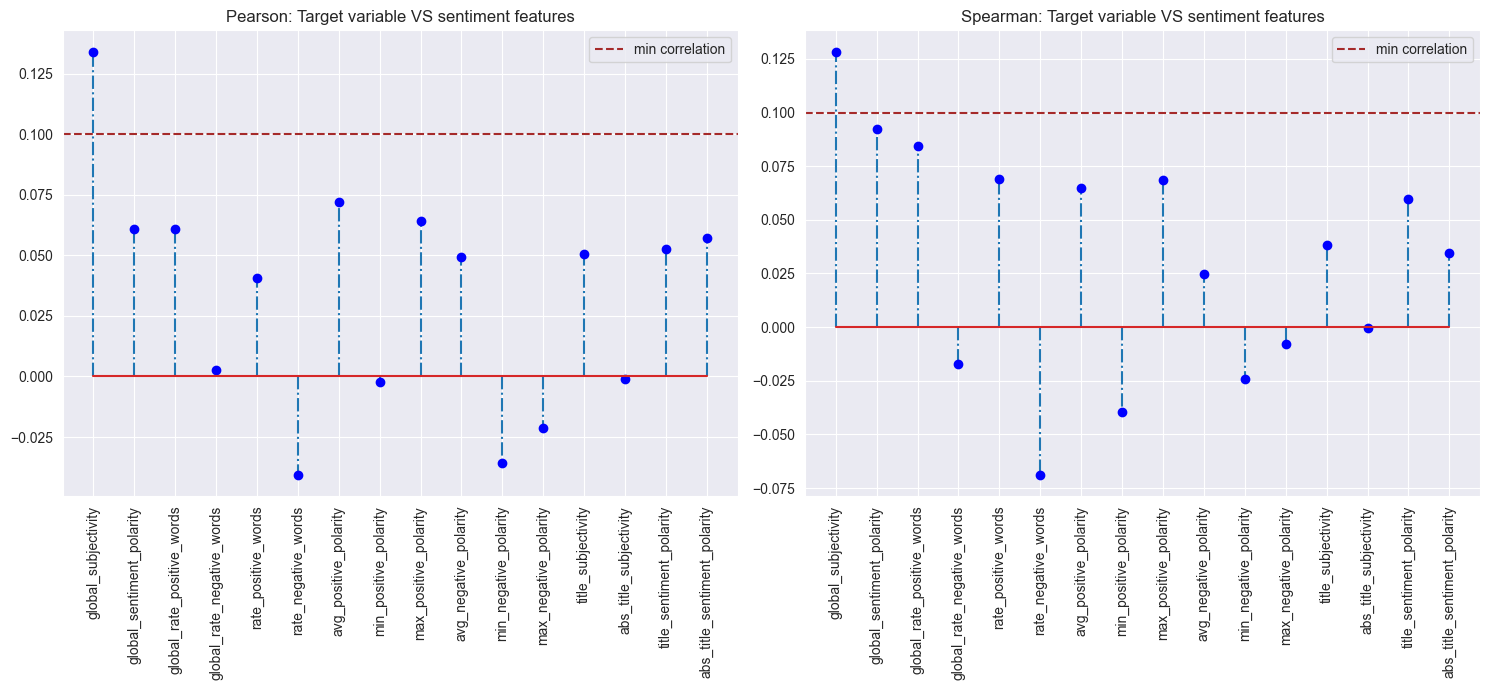

In [46]:
sentiment_attributes = ['global_subjectivity','global_sentiment_polarity','global_rate_positive_words','global_rate_negative_words',
                        'rate_positive_words','rate_negative_words','avg_positive_polarity','min_positive_polarity','max_positive_polarity',
                        'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity','abs_title_subjectivity',
                        'title_sentiment_polarity','abs_title_sentiment_polarity']
df_sentiment_corr = shares_corr[sentiment_attributes]
df_sentiment_corr_sp = shares_corr_sp[sentiment_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(sentiment_attributes, df_sentiment_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[0].set_title("Pearson: Target variable VS sentiment features")
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].legend()
ax[1].stem(sentiment_attributes, df_sentiment_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS sentiment features")
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Media features
- The features show a weak linear correlation with the target variable. 

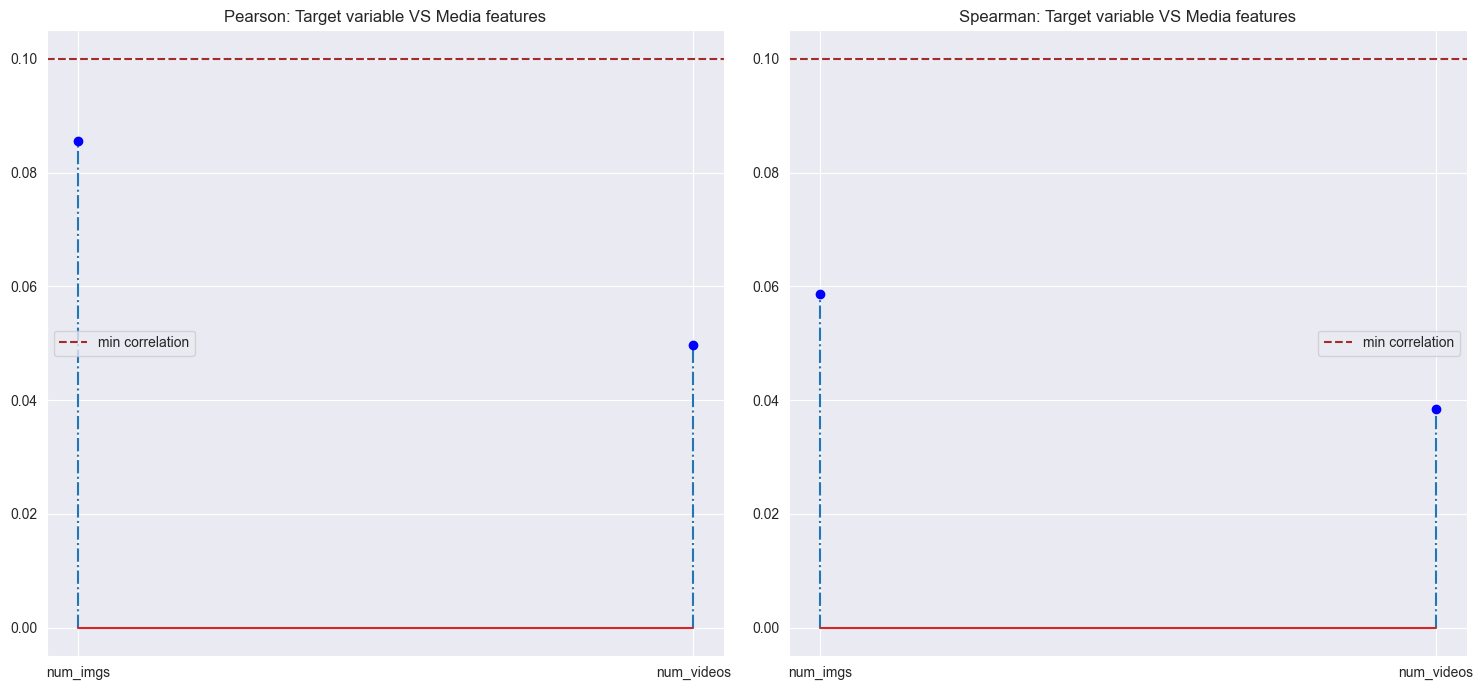

In [47]:
df_media_corr = shares_corr[['num_imgs', 'num_videos']]
df_media_corr_sp = shares_corr_sp[['num_imgs', 'num_videos']]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(['num_imgs', 'num_videos'], df_media_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[0].set_title("Pearson: Target variable VS Media features")
ax[0].legend()
ax[1].stem(['num_imgs', 'num_videos'], df_media_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS Media features")
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Metadata features
- The feature "kw_avg_avg", "kw_min_avg" and "kw_max_avg" shows a relatively high linear correlation with the target variable.
- For what concernes the other variables, the pearson correlation looks like it is on the average of above-analyzed features

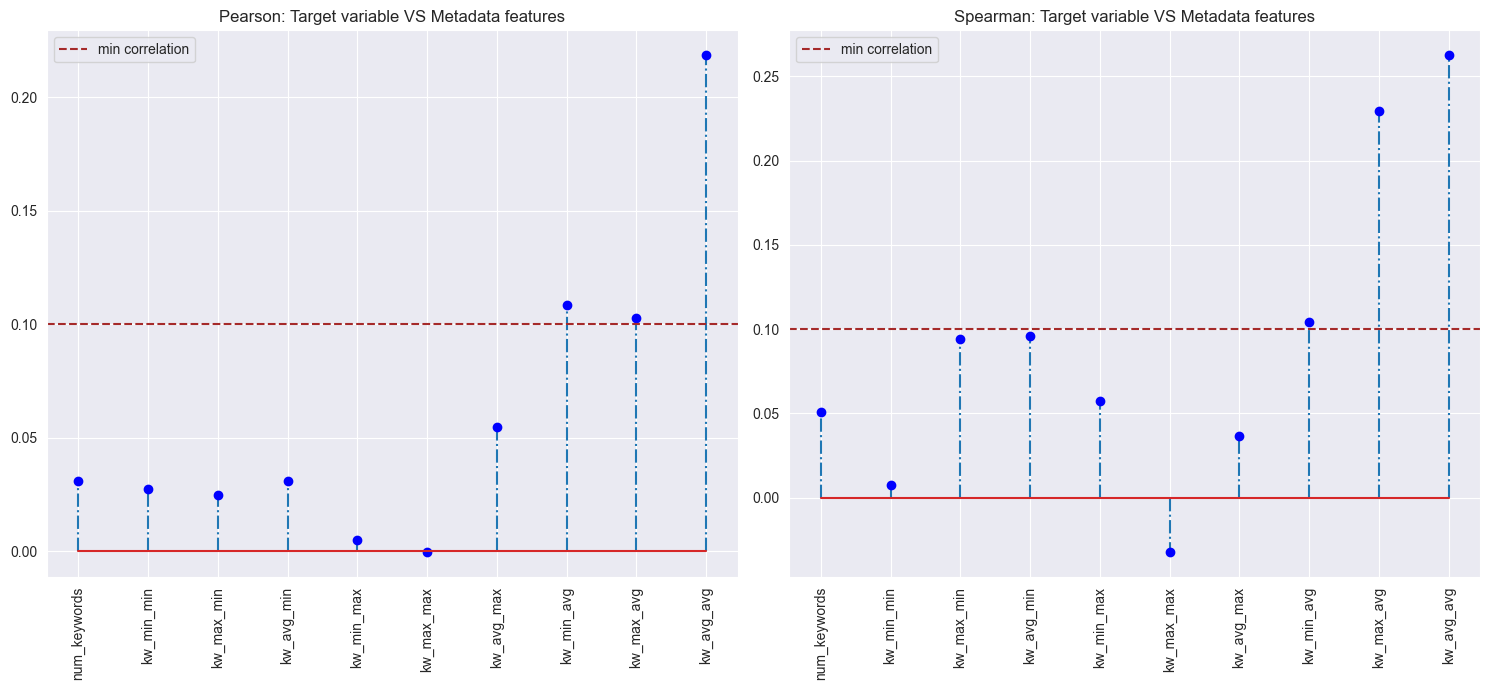

In [48]:
metadata_attributes = ['num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
                       'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']
df_metadata_corr = shares_corr[metadata_attributes]
df_metadata_corr_sp = shares_corr_sp[metadata_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(metadata_attributes, df_metadata_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].set_title("Pearson: Target variable VS Metadata features")
ax[0].legend()
ax[1].stem(metadata_attributes, df_metadata_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[1].grid()
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].set_title("Spearman: Target variable VS Metadata features")
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Linkage features
- For all the features, the pearson correlation looks like it is on the average of above-analyzed features
- The feature "num_hrefs" shows a relatively high linear correlation with the target variable.

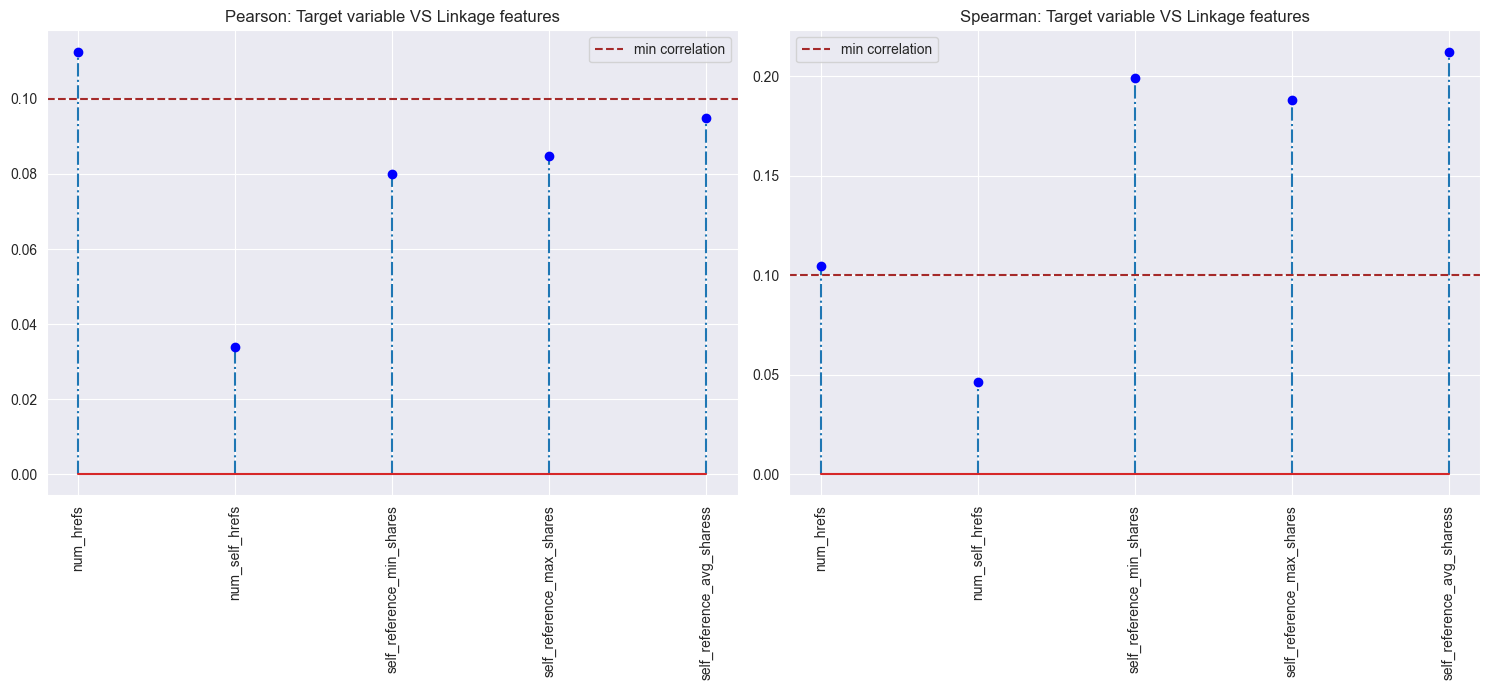

In [49]:
linkage_attributes = ['num_hrefs','num_self_hrefs','self_reference_min_shares','self_reference_max_shares','self_reference_avg_sharess']
df_linkage_corr = shares_corr[linkage_attributes]
df_linkage_corr_sp = shares_corr_sp[linkage_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(linkage_attributes, df_linkage_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].set_title("Pearson: Target variable VS Linkage features")
ax[0].legend()
ax[1].stem(linkage_attributes, df_linkage_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='brown', linestyle='--', label='min correlation')
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].grid()
ax[1].set_title("Spearman: Target variable VS Linkage features")
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Article's statistics features
- For all the features, the pearson correlation looks like it is on the average of above-analyzed features

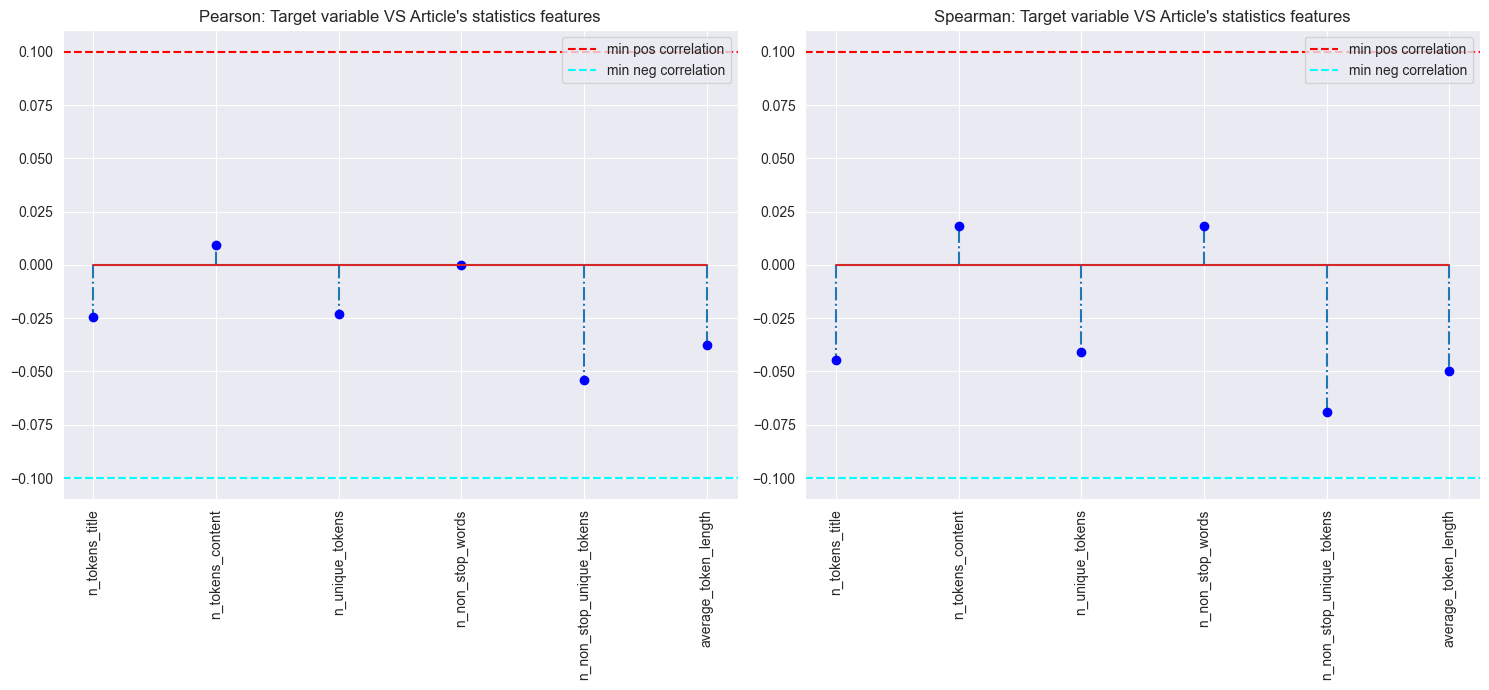

In [50]:
article_stats_attributes = ['n_tokens_title','n_tokens_content','n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens',
                            'average_token_length']
df_article_stats_corr = shares_corr[article_stats_attributes]
df_article_stats_corr_sp = shares_corr_sp[article_stats_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(article_stats_attributes, df_article_stats_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='red', linestyle='--', label='min pos correlation')
ax[0].axhline(y=-0.1, color='cyan', linestyle='--', label='min neg correlation')
ax[0].set_title("Pearson: Target variable VS Article's statistics features")
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].legend()
ax[1].stem(article_stats_attributes, df_article_stats_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='red', linestyle='--', label='min pos correlation')
ax[1].axhline(y=-0.1, color='cyan', linestyle='--', label='min neg correlation')
ax[1].set_title("Spearman: Target variable VS Article's statistics features")
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].grid()
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

#### Target variable VS Topics features
- Data_channel_lifestyle seems to have a relatively high positive linear correlation with the target value.
- Data_channel_world, LDA_02 and LDA_03 seems to have a relatively high negative linear correlation with the target value.
- For all other features, the pearson correlation looks like it is on the average of above-analyzed features.

In [51]:
additional_columns

array(['weekday_friday', 'weekday_monday', 'weekday_saturday',
       'weekday_sunday', 'weekday_thursday', 'weekday_tuesday',
       'weekday_wednesday', 'data_channel_bus',
       'data_channel_entertainment', 'data_channel_lifestyle',
       'data_channel_socmed', 'data_channel_tech', 'data_channel_world'],
      dtype=object)

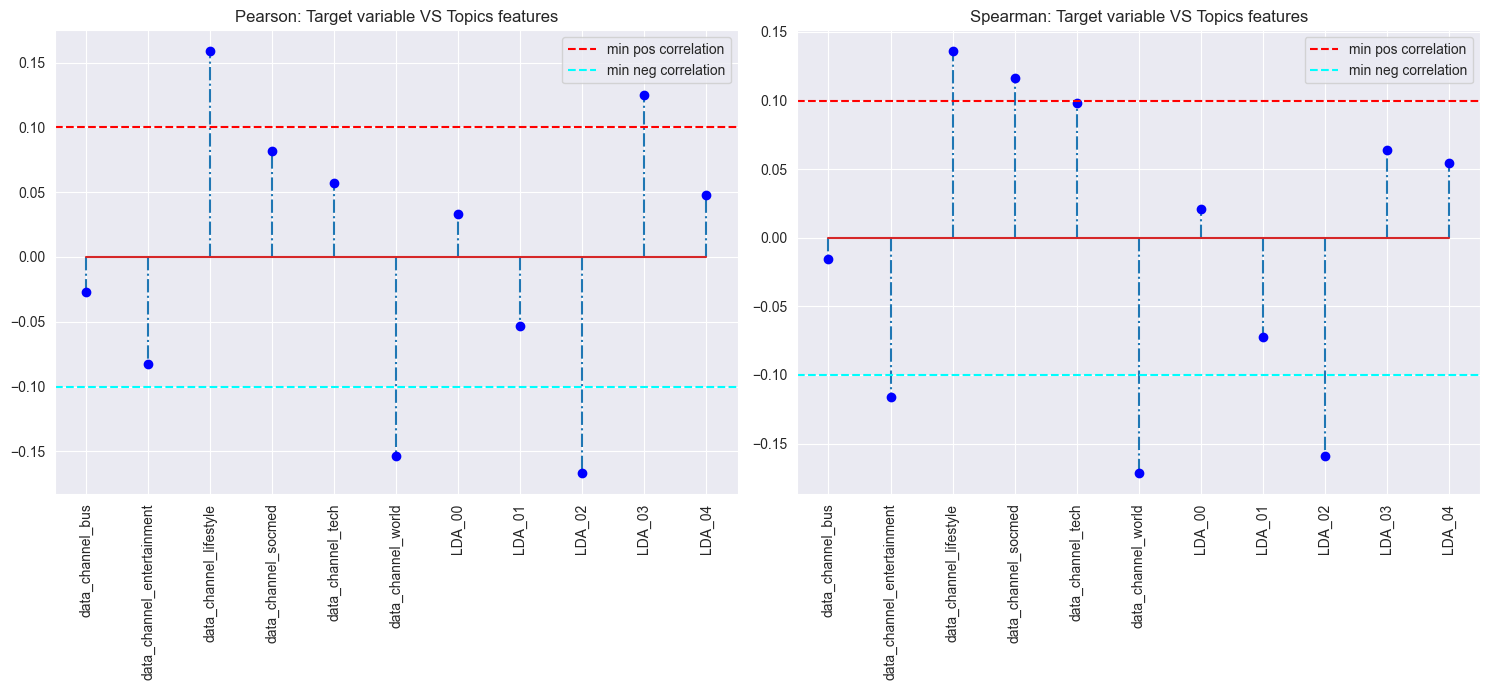

In [52]:
topics_attributes = ['data_channel_bus', 'data_channel_entertainment', 'data_channel_lifestyle', 'data_channel_socmed',
                     'data_channel_tech', 'data_channel_world', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
df_topics_corr = shares_corr[topics_attributes]
df_topics_corr_sp = shares_corr_sp[topics_attributes]

fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].stem(topics_attributes, df_topics_corr, linefmt='-.', markerfmt='bo')
ax[0].axhline(y=0.1, color='red', linestyle='--', label='min pos correlation')
ax[0].axhline(y=-0.1, color='cyan', linestyle='--', label='min neg correlation')
ax[0].set_title("Pearson: Target variable VS Topics features")
ax[0].tick_params(axis='x', labelrotation = 90)
ax[0].legend()
ax[1].stem(topics_attributes, df_topics_corr_sp, linefmt='-.', markerfmt='bo')
ax[1].axhline(y=0.1, color='red', linestyle='--', label='min pos correlation')
ax[1].axhline(y=-0.1, color='cyan', linestyle='--', label='min neg correlation')
ax[1].set_title("Spearman: Target variable VS Topics features")
ax[1].tick_params(axis='x', labelrotation = 90)
ax[1].grid()
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.show()

### Exploring some interesting correlations about the above plots

#### Sentiment features VS Article's statistics features

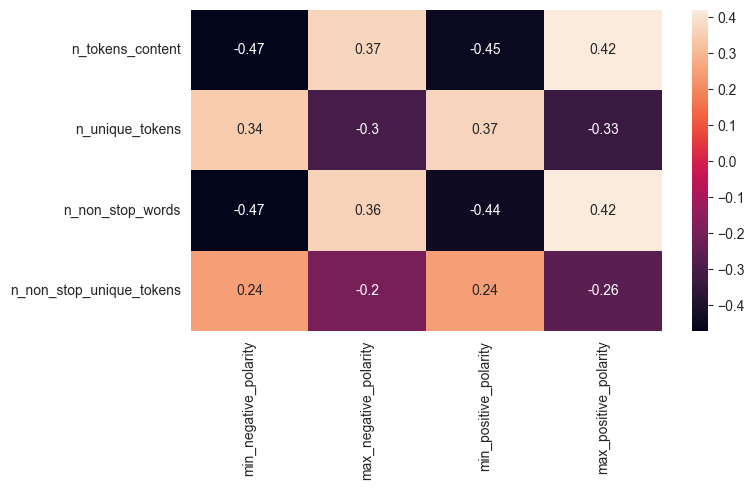

In [53]:
sentiment_attributes = ['min_negative_polarity', 'max_negative_polarity', 'min_positive_polarity', 'max_positive_polarity']
article_stats_attributes = ['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']

df_sent_art_corr = shares_corr_sp[linkage_attributes]

_, ax = plt.subplots(1,1, figsize=(8, 5))
sns.heatmap(non_lin_corr_log[sentiment_attributes].loc[article_stats_attributes], ax=ax, annot=True)
plt.tight_layout()
plt.show()

/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/3023729298.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


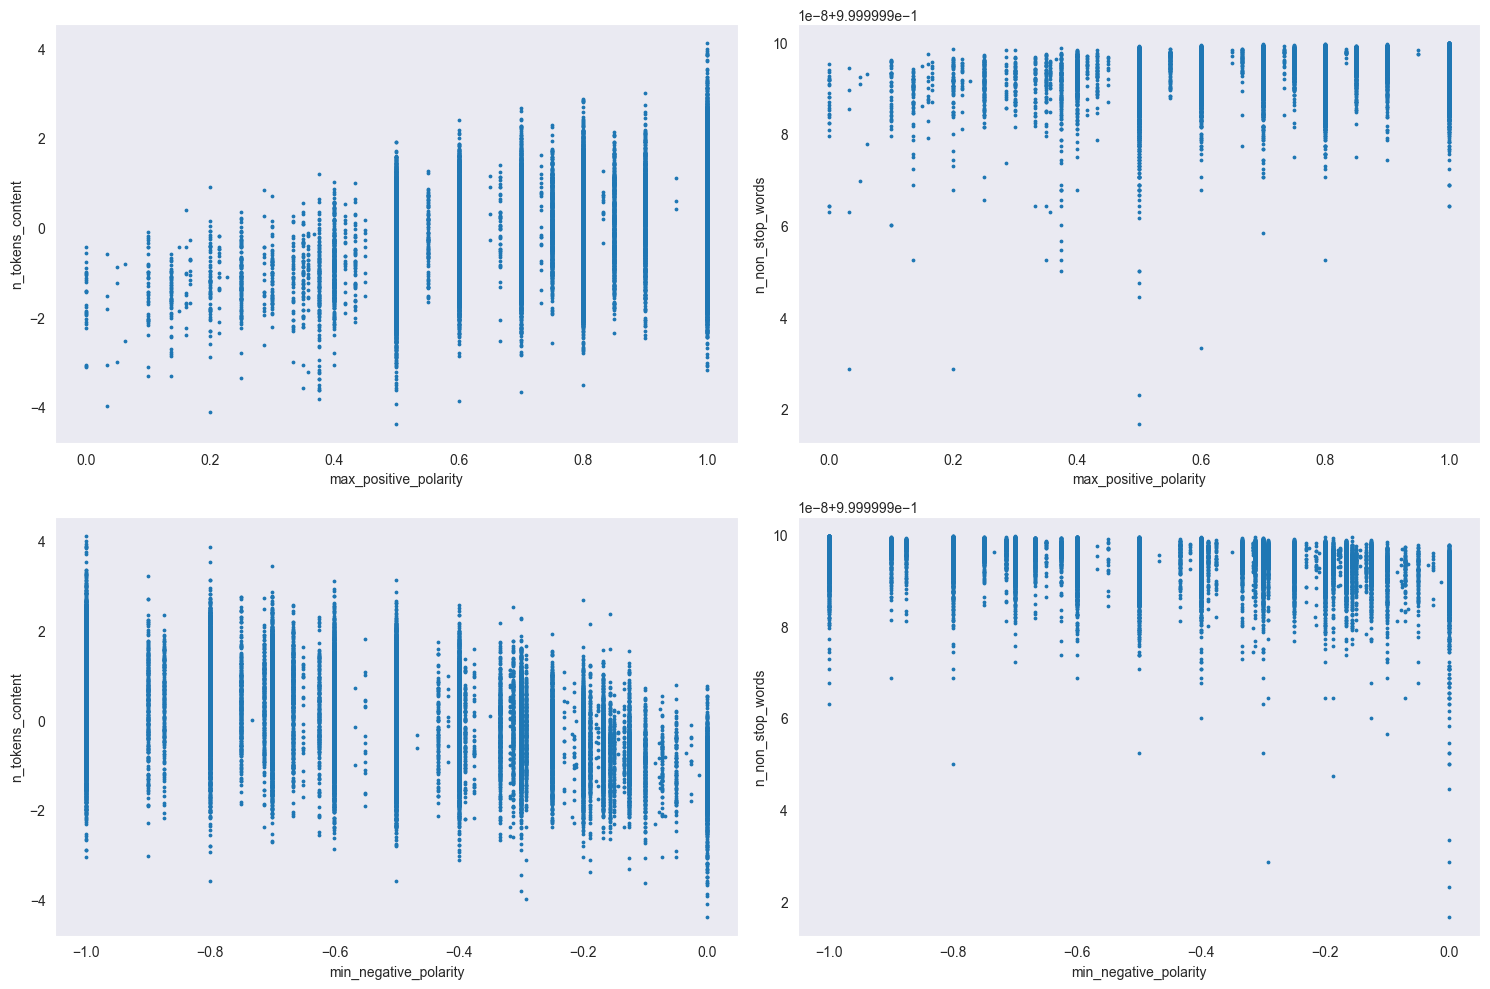

In [54]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))


ax[0][0].scatter(working_df_dev['max_positive_polarity'], working_df_dev['n_tokens_content'], s=3)
ax[0][0].grid()
ax[0][0].set_xlabel('max_positive_polarity')
ax[0][0].set_ylabel('n_tokens_content')

ax[0][1].scatter(working_df_dev['max_positive_polarity'], working_df_dev['n_non_stop_words'], s=3)
ax[0][1].grid()
ax[0][1].set_xlabel('max_positive_polarity')
ax[0][1].set_ylabel('n_non_stop_words')

ax[1][0].scatter(working_df_dev['min_negative_polarity'], working_df_dev['n_tokens_content'], s=3)
ax[1][0].grid()
ax[1][0].set_xlabel('min_negative_polarity')
ax[1][0].set_ylabel('n_tokens_content')

ax[1][1].scatter(working_df_dev['min_negative_polarity'], working_df_dev['n_non_stop_words'], s=3)
ax[1][1].grid()
ax[1][1].set_xlabel('min_negative_polarity')
ax[1][1].set_ylabel('n_non_stop_words')

fig.tight_layout()
fig.show()

#### Article's statistics + Linkage + num_imgs VS Article's statistics + Linkage + num_imgs

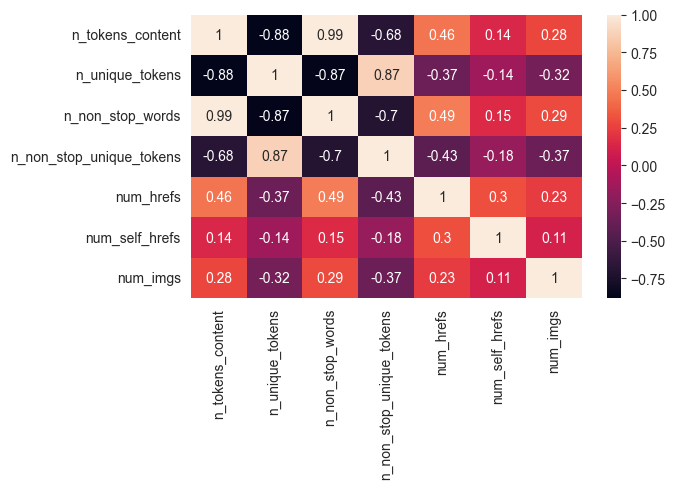

In [55]:
sentiment_linkage_imgs = ['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
                            'num_hrefs', 'num_self_hrefs', 'num_imgs']


_, ax = plt.subplots(1,1, figsize=(7, 5))
sns.heatmap(non_lin_corr_log[sentiment_linkage_imgs].loc[sentiment_linkage_imgs], ax=ax, annot=True)
plt.tight_layout()
plt.show()

/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/1917502200.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


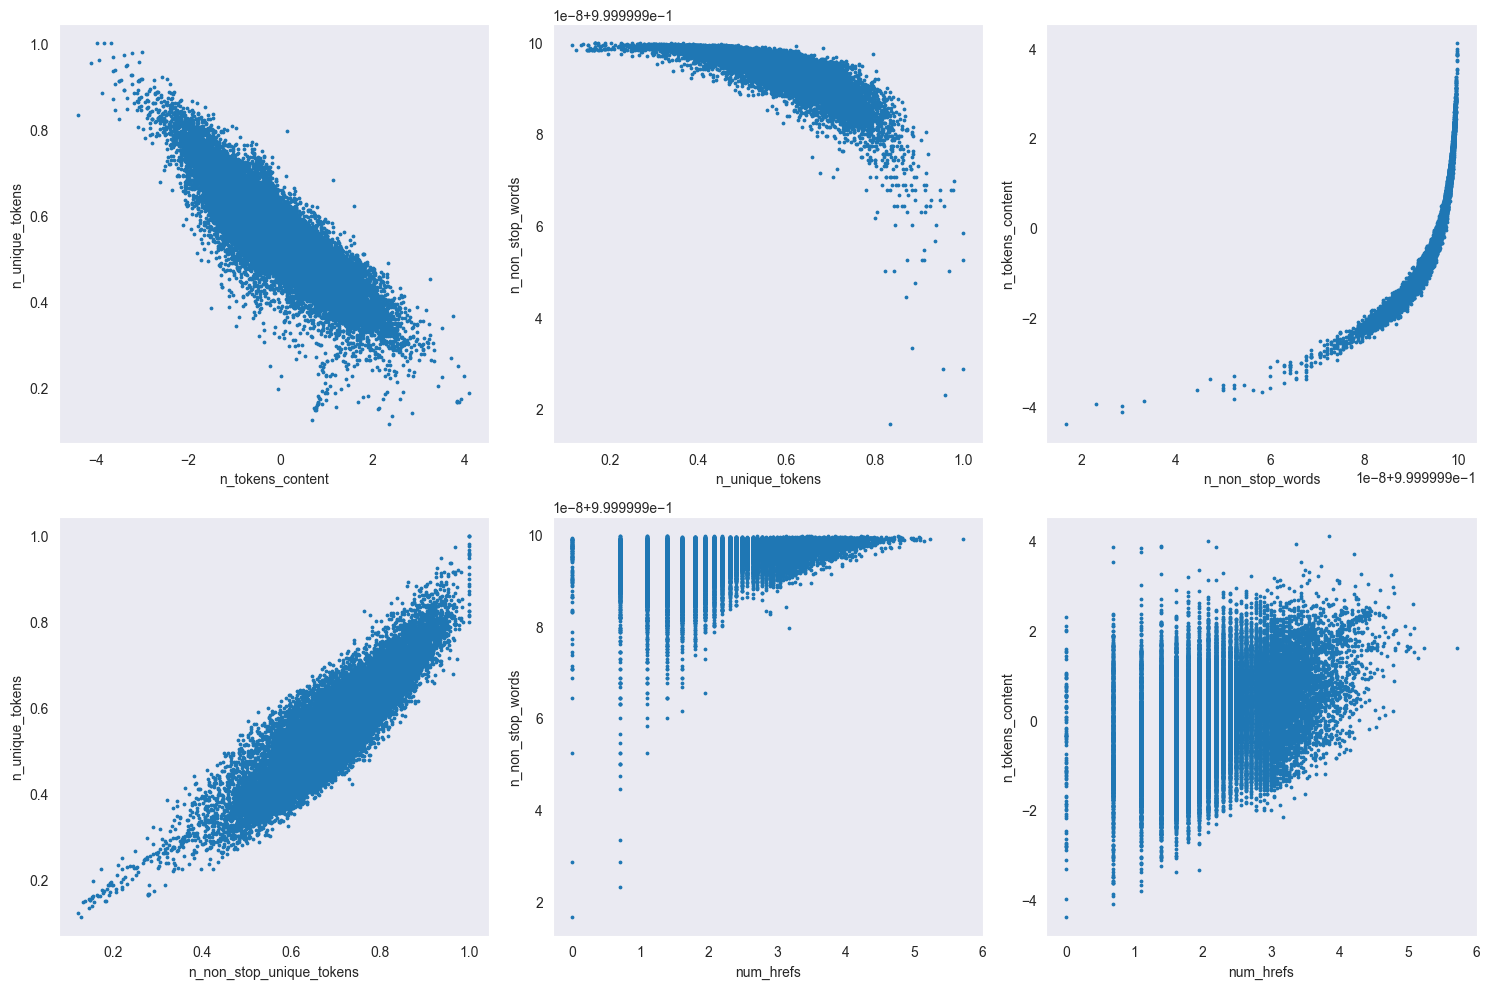

In [56]:
fig, ax = plt.subplots(2,3, figsize=(15, 10))


ax[0][0].scatter(working_df_dev['n_tokens_content'], working_df_dev['n_unique_tokens'], s=3)
ax[0][0].grid()
ax[0][0].set_xlabel('n_tokens_content')
ax[0][0].set_ylabel('n_unique_tokens')

ax[0][1].scatter(working_df_dev['n_unique_tokens'], working_df_dev['n_non_stop_words'], s=3)
ax[0][1].grid()
ax[0][1].set_xlabel('n_unique_tokens')
ax[0][1].set_ylabel('n_non_stop_words')

ax[0][2].scatter(working_df_dev['n_non_stop_words'], working_df_dev['n_tokens_content'], s=3)
ax[0][2].grid()
ax[0][2].set_xlabel('n_non_stop_words')
ax[0][2].set_ylabel('n_tokens_content')

ax[1][0].scatter(working_df_dev['n_non_stop_unique_tokens'], working_df_dev['n_unique_tokens'], s=3)
ax[1][0].grid()
ax[1][0].set_xlabel('n_non_stop_unique_tokens')
ax[1][0].set_ylabel('n_unique_tokens')

ax[1][1].scatter(working_df_dev['num_hrefs'], working_df_dev['n_non_stop_words'], s=3)
ax[1][1].grid()
ax[1][1].set_xlabel('num_hrefs')
ax[1][1].set_ylabel('n_non_stop_words')

ax[1][2].scatter(working_df_dev['num_hrefs'], working_df_dev['n_tokens_content'], s=3)
ax[1][2].grid()
ax[1][2].set_xlabel('num_hrefs')
ax[1][2].set_ylabel('n_tokens_content')

fig.tight_layout()
fig.show()

#### Article's statistics + Metadata VS Article's statistics + Metadata

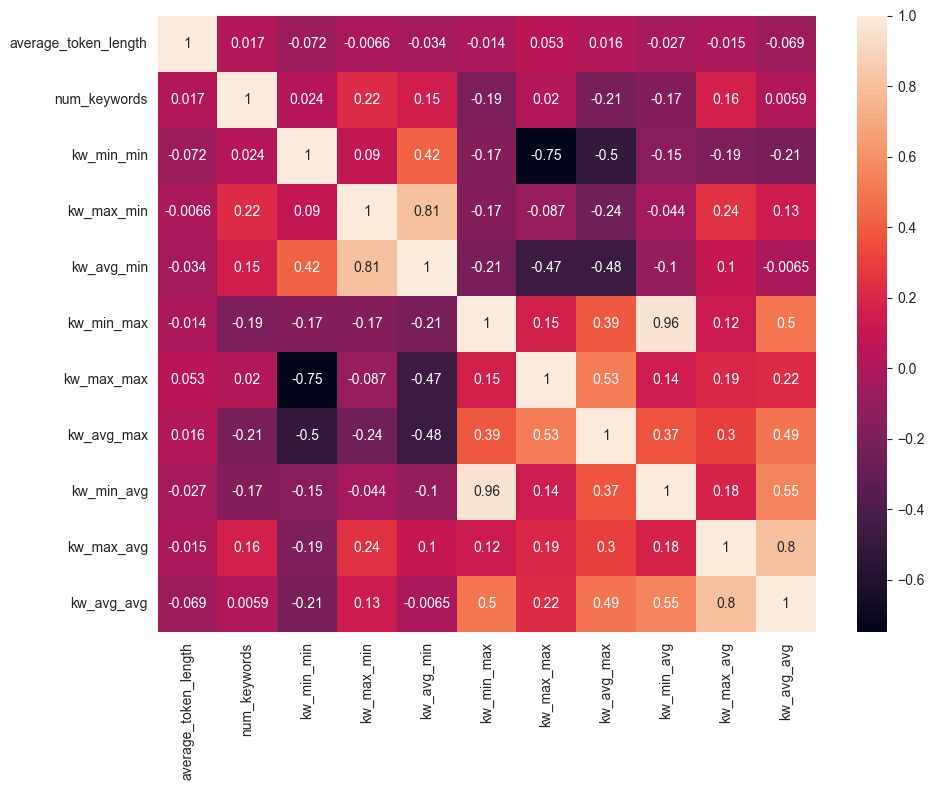

In [57]:
art_meta = ['average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min',
                            'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']


_, ax = plt.subplots(1,1, figsize=(10, 8))
sns.heatmap(non_lin_corr_log[art_meta].loc[art_meta], ax=ax, annot=True)
plt.tight_layout()
plt.show()

/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/552718829.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


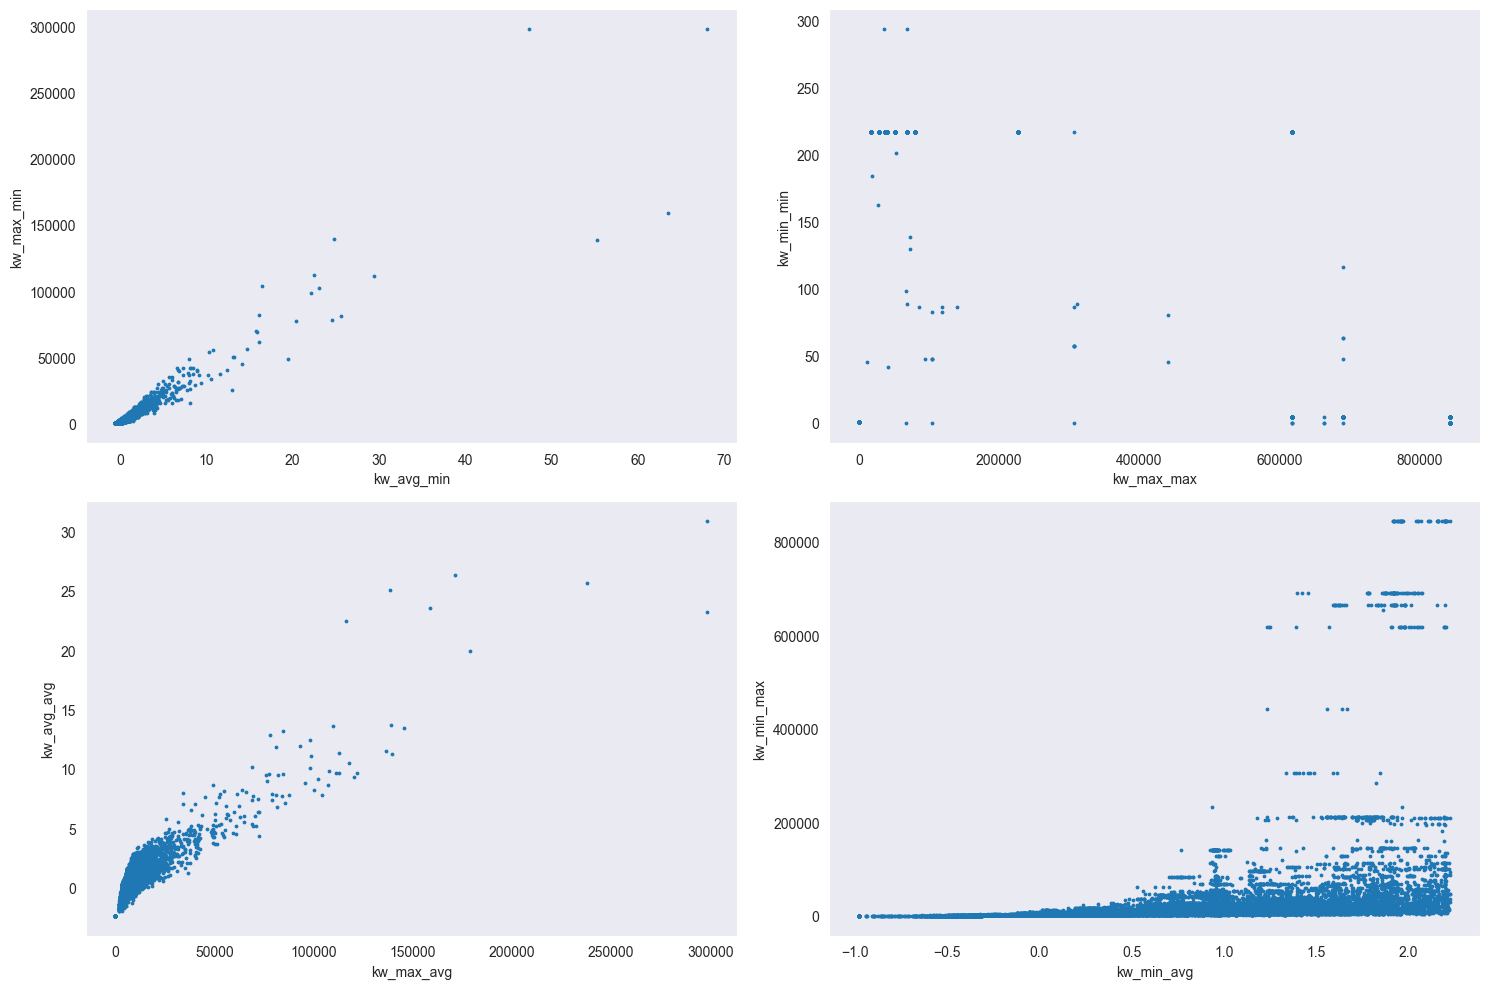

In [58]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))


ax[0][0].scatter(working_df_dev['kw_avg_min'], working_df_dev['kw_max_min'], s=3)
ax[0][0].grid()
ax[0][0].set_xlabel('kw_avg_min')
ax[0][0].set_ylabel('kw_max_min')

ax[0][1].scatter(working_df_dev['kw_max_max'], working_df_dev['kw_min_min'], s=3)
ax[0][1].grid()
ax[0][1].set_xlabel('kw_max_max')
ax[0][1].set_ylabel('kw_min_min')

ax[1][0].scatter(working_df_dev['kw_max_avg'], working_df_dev['kw_avg_avg'], s=3)
ax[1][0].grid()
ax[1][0].set_xlabel('kw_max_avg')
ax[1][0].set_ylabel('kw_avg_avg')

ax[1][1].scatter(working_df_dev['kw_min_avg'], working_df_dev['kw_min_max'], s=3)
ax[1][1].grid()
ax[1][1].set_xlabel('kw_min_avg')
ax[1][1].set_ylabel('kw_min_max')

fig.tight_layout()
fig.show()

#### Sentiment_subj VS Sentiment_subj

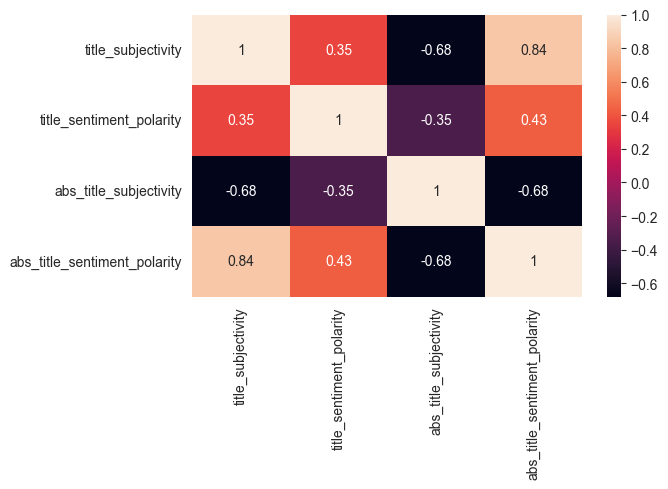

In [59]:
sentiment_subj = ['title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']


_, ax = plt.subplots(1,1, figsize=(7, 5))
sns.heatmap(non_lin_corr_log[sentiment_subj].loc[sentiment_subj], ax=ax, annot=True)
plt.tight_layout()
plt.show()

/var/folders/6w/dmgtk2bn4jx1mdj87jl8c6sh0000gn/T/ipykernel_5776/2036869724.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


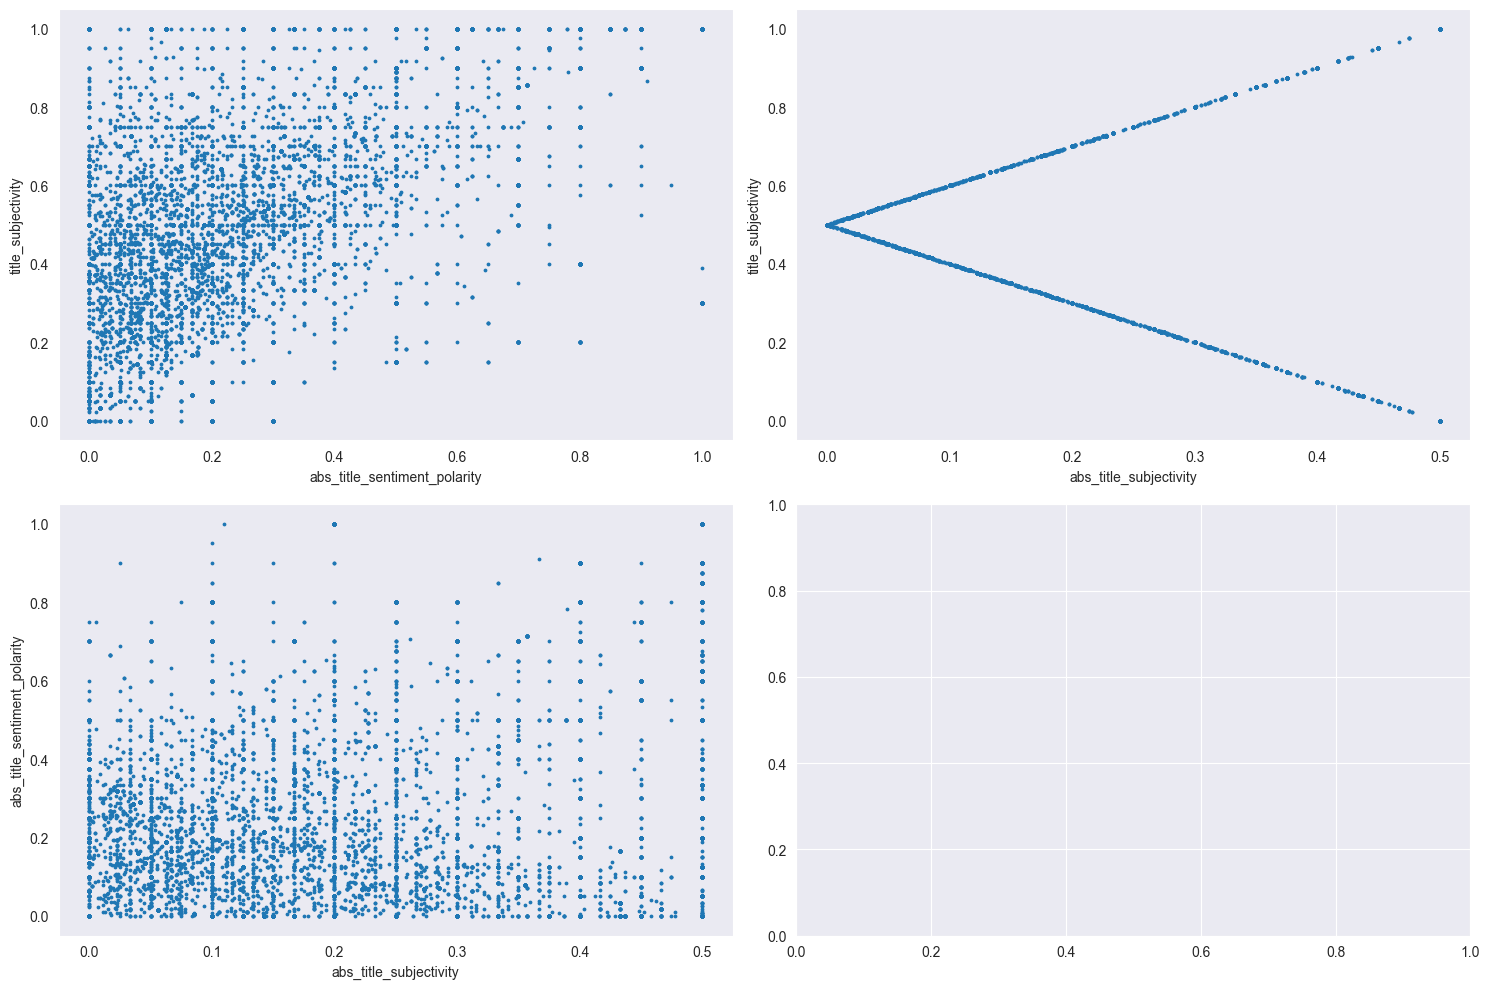

In [60]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))


ax[0][0].scatter(working_df_dev['abs_title_sentiment_polarity'], working_df_dev['title_subjectivity'], s=3)
ax[0][0].grid()
ax[0][0].set_xlabel('abs_title_sentiment_polarity')
ax[0][0].set_ylabel('title_subjectivity')

ax[0][1].scatter(working_df_dev['abs_title_subjectivity'], working_df_dev['title_subjectivity'], s=3)
ax[0][1].grid()
ax[0][1].set_xlabel('abs_title_subjectivity')
ax[0][1].set_ylabel('title_subjectivity')

ax[1][0].scatter(working_df_dev['abs_title_subjectivity'], working_df_dev['abs_title_sentiment_polarity'], s=3)
ax[1][0].grid()
ax[1][0].set_xlabel('abs_title_subjectivity')
ax[1][0].set_ylabel('abs_title_sentiment_polarity')


fig.tight_layout()
fig.show()

#### Sentiment_pol VS Sentiment_pol

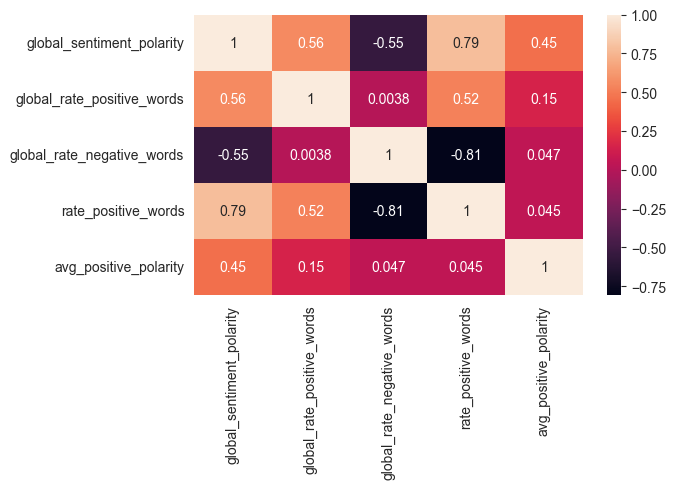

In [61]:
sentiment_pol = ['global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words',
                'avg_positive_polarity']


_, ax = plt.subplots(1,1, figsize=(7, 5))
sns.heatmap(non_lin_corr_log[sentiment_pol].loc[sentiment_pol], ax=ax, annot=True)
plt.tight_layout()
plt.show()

In [63]:
working_df_dev.isna().sum()

timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
n_non_stop_words                0
n_non_stop_unique_tokens        0
num_hrefs                       0
num_self_hrefs                  0
num_imgs                        0
num_videos                      0
average_token_length            0
num_keywords                    0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_sharess      0
LDA_00                          0
LDA_01                          0
LDA_02                          0
LDA_03                          0
LDA_04                          0
global_subject